In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Census Income

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Aditya-Mankar/Census-Income-Prediction/master/adult.csv")

This data contains details from census from many country which have details like age , workclass , educaction there martial status , gender with native country and there Annual income. And the prediction model also need to be built on this input details.

In [3]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
df.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
df.shape
print("Number of Rows are",df.shape[0])
print("Number of Columns are",df.shape[1])

Number of Rows are 32561
Number of Columns are 15


There are total 32561 Rows in this dataset and Total 15 Columns whereas Income is the target variable and the remaining columns contains the detail of each member which was taken while the census columns contain report like Age, Workclass, Education etc.

In [6]:
df.columns.tolist()

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education.num',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital.gain',
 'capital.loss',
 'hours.per.week',
 'native.country',
 'income']

In [7]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64


Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64


164190    13
203488    13
123011    13
113364    12
121124    12
          ..
183522     1
44419      1
442612     1
374833     1
257302     1
Name: fnlwgt, Length: 21648, dtype: int64


HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64


9     10501
10 

Here we have extracted the value counts of each columns. Which results in column Occupation , native.country and workclass have some value which have contain " ? " this data need to be treated further.

In [8]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

Finding out the missing value from the dataset which results there is no Missing value present in the data.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [11]:
cols = ['native.country' , "occupation" , "workclass"]
for i in cols:
    df[i] = df[i].replace({"?" : "unknown"})

Here Column native.country , occupation , workclass had value as ? which are replaced with unknown.

In [12]:
df["workclass"].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
unknown              1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

<Axes: >

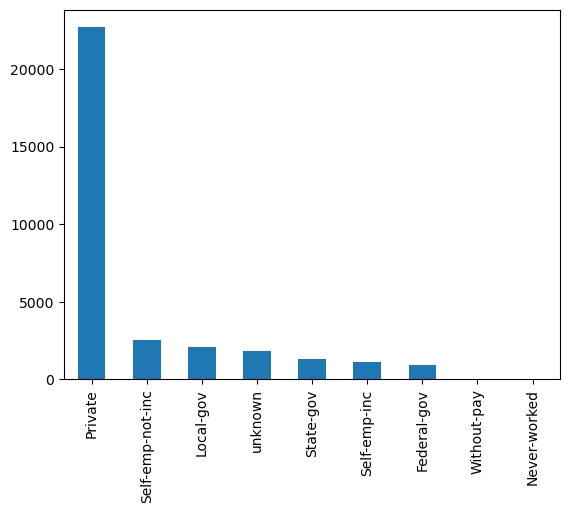

In [13]:
df["workclass"].value_counts().plot(kind="bar")

<Axes: >

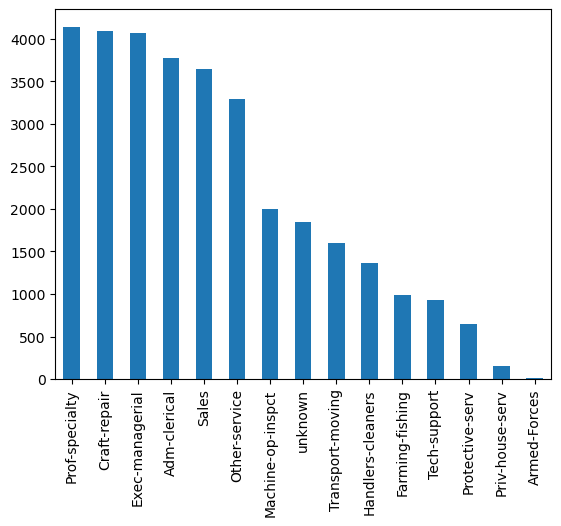

In [14]:
df["occupation"].value_counts().plot(kind="bar")

<Axes: >

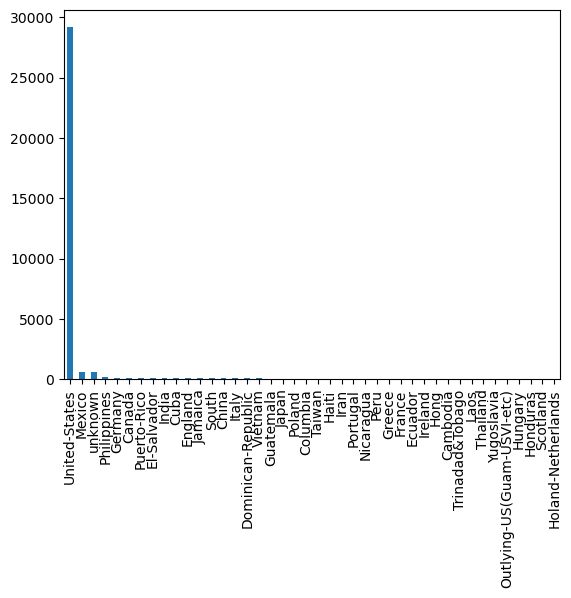

In [15]:
df["native.country"].value_counts().plot(kind="bar")

Here we have replaced ? as unknown and also checked the columns by plotting the columns,
Further we have checked if there is any missing value present in the data with heatmap which have resulted as there is no missing value.

<Axes: >

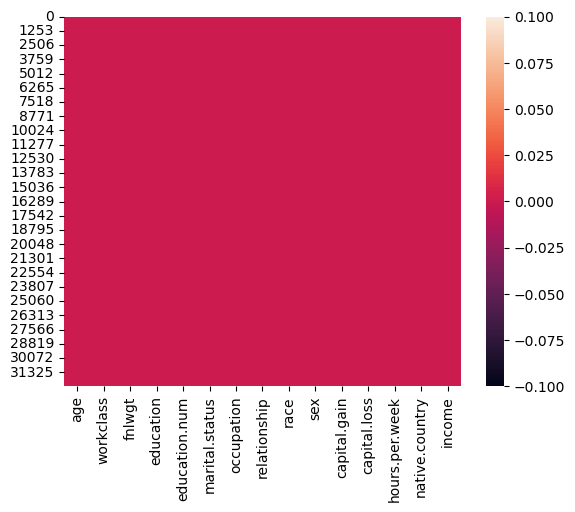

In [16]:
sns.heatmap(df.isnull())

<Axes: xlabel='income', ylabel='count'>

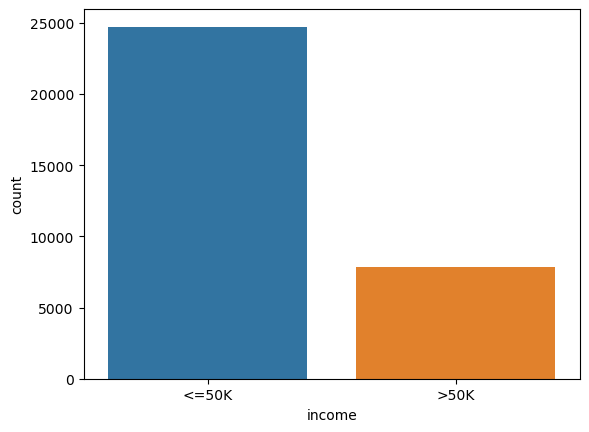

In [17]:
sns.countplot(x="income" , data=df)

<Axes: xlabel='income', ylabel='count'>

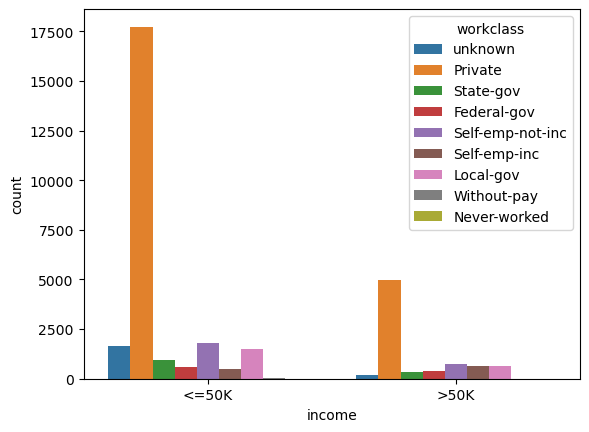

In [18]:
sns.countplot(x='income' ,hue="workclass", data=df)

In this we have taken X as income and comparison with workclass.

<Axes: xlabel='income', ylabel='count'>

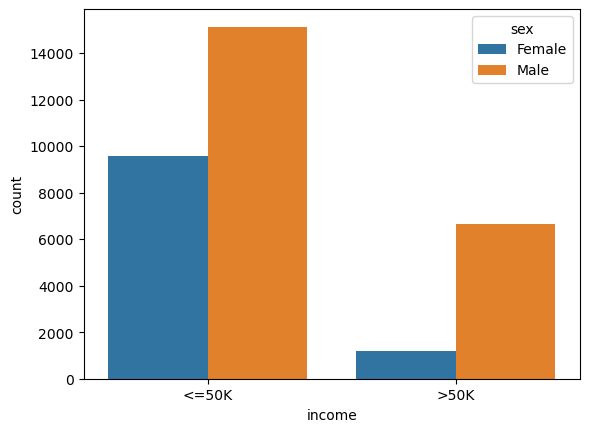

In [19]:
sns.countplot(x='income' ,hue="sex", data=df)

In [20]:
df.duplicated().sum()

24

In [21]:
df = df[-df.duplicated()]

In [22]:
df.duplicated().sum()

0

Here finding out the duplicate value from the data and removed the duplicate data from the dataset.

In [23]:
df.replace('unknown',np.NaN , inplace=True)

Replaced the Unknown from the column with NaN.

In [24]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     582
income               0
dtype: int64

In [25]:
df["workclass"] = df["workclass"].fillna(df["workclass"].mode()[0])

In [26]:
df["occupation"] = df["occupation"].fillna(df["occupation"].mode()[0])

In [27]:
df["native.country"] = df["native.country"].fillna(df["native.country"].mode()[0])

In [28]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

filling out the NaN with the Mode and finding out if there is any missing value in the data checked with isnull.

In [29]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [30]:
df["income"].value_counts()

<=50K    24698
>50K      7839
Name: income, dtype: int64

In [31]:
df['income'] = df["income"].map({"<=50K":0 , ">50K":1})

Here we have mapped the categorical column into numerical were income is less than or equal to 50k is mapped as 0 and income more than 50k is mapped as 1.

In [32]:
print(df["income"])

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income, Length: 32537, dtype: int64


In [33]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income             int64
dtype: object

In [34]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [35]:
df["workclass"] = enc.fit_transform(df["workclass"])

In [36]:
df["education"] = enc.fit_transform(df["education"])

In [37]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

In [38]:
encode = oe.fit_transform(df[["marital.status" , "occupation" , "relationship" , "race" , "sex" , "native.country"]])

In [39]:
df[["marital.status" , "occupation" , "relationship" , "race" , "sex" , "native.country"]] = encode

Converting the remaining data into numerical data which help the model to predict most accurate result.

In [40]:
df.dtypes

age                 int64
workclass           int32
fnlwgt              int64
education           int32
education.num       int64
marital.status    float64
occupation        float64
relationship      float64
race              float64
sex               float64
capital.gain        int64
capital.loss        int64
hours.per.week      int64
native.country    float64
income              int64
dtype: object

Checked the datatype of each columns we have successfully converted the data into numerical and after that we have also created the numerical description of the data.

In [41]:
df.describe()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,32537.000000,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,3.094446,1.897808e+05,10.297507,10.081815,2.611427,6.139288,1.446538,3.665827,0.669238,1078.443741,87.368227,40.440329,36.419184,0.240926
std,13.637984,1.107549,1.055565e+05,3.870142,2.571633,1.506301,3.973173,1.607064,0.848847,0.470495,7387.957424,403.101833,12.346889,6.053816,0.427652
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,3.000000,1.178270e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,3.000000,1.783560e+05,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,48.000000,3.000000,2.369930e+05,12.000000,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,90.000000,7.000000,1.484705e+06,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,40.000000,1.000000


Splitting the data into x and y for training and testing.

In [42]:
x = df.drop(["income","fnlwgt"],axis=1)
x

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,3,11,9,6.0,9.0,1.0,4.0,0.0,0,4356,40,38.0
1,82,3,11,9,6.0,3.0,1.0,4.0,0.0,0,4356,18,38.0
2,66,3,15,10,6.0,9.0,4.0,2.0,0.0,0,4356,40,38.0
3,54,3,5,4,0.0,6.0,4.0,4.0,0.0,0,3900,40,38.0
4,41,3,15,10,5.0,9.0,3.0,4.0,0.0,0,3900,40,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,3,15,10,4.0,10.0,1.0,4.0,1.0,0,0,40,38.0
32557,27,3,7,12,2.0,12.0,5.0,4.0,0.0,0,0,38,38.0
32558,40,3,11,9,2.0,6.0,0.0,4.0,1.0,0,0,40,38.0
32559,58,3,11,9,6.0,0.0,4.0,4.0,0.0,0,0,40,38.0


In [43]:
y = df["income"]
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income, Length: 32537, dtype: int64

In [44]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split( x , y , test_size=0.20 , random_state=42)

In [45]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((26029, 13), (6508, 13), (26029,), (6508,))

In [46]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train , y_train)

LogisticRegression()

In [47]:
pred_lr = lr.predict(x_test)
pred_lr

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
sc_lr = accuracy_score(y_test , pred_lr)
sc_lr

0.8123847572218807

In [50]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train , y_train)

GaussianNB()

In [51]:
pred_gnb = gnb.predict(x_test)
pred_gnb

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [52]:
sc_gnb = accuracy_score(y_test , pred_gnb)
sc_gnb

0.8040872771972957

In [53]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train , y_train)

SVC()

In [54]:
pred_svc = svc.predict(x_test)
pred_svc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [55]:
sc_svc = accuracy_score(y_test , pred_svc)
sc_svc

0.8056238475722188

In [56]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(x_train , y_train)

KNeighborsClassifier()

In [57]:
pred_kn = kn.predict(x_test)
pred_kn

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [58]:
sc_kn = accuracy_score(y_test , pred_kn)
sc_kn

0.8426551936078672

In [59]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train , y_train)

DecisionTreeClassifier()

In [60]:
pred_dtc = dtc.predict(x_test)
pred_dtc

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [61]:
sc_dtc = accuracy_score( y_test , pred_dtc)
sc_dtc

0.8171481253841426

In [62]:
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier , AdaBoostClassifier

In [63]:
rfc = RandomForestClassifier()
rfc.fit(x_train , y_train)

RandomForestClassifier()

In [64]:
pred_rfc = rfc.predict(x_test)
pred_rfc

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [65]:
sc_rfc =  accuracy_score(y_test , pred_rfc)
sc_rfc

0.8481868469575906

In [66]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train , y_train)

GradientBoostingClassifier()

In [67]:
pred_gbc = gbc.predict(x_test)
pred_gbc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [68]:
sc_gbc = accuracy_score(y_test , pred_gbc)
sc_gbc

0.8649354640442533

In [69]:
abc = AdaBoostClassifier()
abc.fit(x_train , y_train)

AdaBoostClassifier()

In [70]:
pred_abc =  abc.predict(x_test)
pred_abc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [71]:
sc_abc =  accuracy_score (y_test , pred_abc)
sc_abc

0.8603257529194838

In [72]:
df = pd.DataFrame({"MODEL":["Ada Boost Classifier" , "Gradient Boosting Classifier" , 
                            "Random Forest Classifier" , "Decision Tree Classifier" ,
                            "KNeighbors Classifier" , "SVC" , "Gaussian NB" , "Logistic Regression"] ,  
                   "RESULTS":[sc_abc , sc_gbc , sc_rfc , sc_dtc , sc_kn , sc_svc , sc_gnb , sc_lr]})
df

,MODEL,RESULTS
0,Ada Boost Classifier,0.860326
1,Gradient Boosting Classifier,0.864935
2,Random Forest Classifier,0.848187
3,Decision Tree Classifier,0.817148
4,KNeighbors Classifier,0.842655
5,SVC,0.805624
6,Gaussian NB,0.804087
7,Logistic Regression,0.812385


post splitting the data into x and y data was divided for training and testing we have used many models to get result and the best result further will be used in prediction model.

In [73]:
print(x.head(10))
print(y.head(10))

   age  workclass  education  education.num  marital.status  occupation  \
0   90          3         11              9             6.0         9.0   
1   82          3         11              9             6.0         3.0   
2   66          3         15             10             6.0         9.0   
3   54          3          5              4             0.0         6.0   
4   41          3         15             10             5.0         9.0   
5   34          3         11              9             0.0         7.0   
6   38          3          0              6             5.0         0.0   
7   74          6         10             16             4.0         9.0   
8   68          0         11              9             0.0         9.0   
9   41          3         15             10             4.0         2.0   

   relationship  race  sex  capital.gain  capital.loss  hours.per.week  \
0           1.0   4.0  0.0             0          4356              40   
1           1.0   4.0  0.0

In [74]:
data = (41,3,15,10,4.0,2.0,4.0,4.0,1.0,0,3004,60,38.0)
data_as_np_array = np.asarray(data)
data_reshaped = data_as_np_array.reshape(1,-1)
prediction = gbc.predict(data_reshaped)
print(prediction)

[1]


In [75]:
if (prediction[0]==1):
    print("Person makes over $50k a year")
else:
    print("Person makes Less than or Equal to $50k a year")

Person makes over $50k a year


Model is built using many classification models and the prediction model is built as per the result we have received from our models, its made to predict the annual income of members its predicting income is less than or equal to 50k and income of member is more than 50k.
we have used Gradient Boosting Classifier which is giving results of 0.864935 which is the best fitresult and the second best result is coming from Ada Boost Classifier result of 0.860326, In the prediction model we have Gradient Boosting Classifier.
as per the input data in the model its predicting person income.

# Insurance Claim Fraud Detection

In [76]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")

In [77]:
df.shape

(1000, 40)

In this dataset we have details from insurance policy with there customer details in that we also have detail of the accident on which basis claim can be made.
We have total 1000 number of rows have details of each customer and there policy number,
and 40 columns have all the details whereas fraud_reported is our target variable and rest of the column contains the details like policy number , bind date , police report was done or not etc.

In [78]:
print("Number of Rows are",df.shape[0])
print("Number of Columns are",df.shape[1])

Number of Rows are 1000
Number of Columns are 40


In [79]:
df.head(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
5,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,NO,64100,6410,6410,51280,Saab,95,2003,Y,NaN
6,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,...,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,NaN
7,165,37,429027,03-02-1990,IL,100/300,1000,1137.03,0,603195,...,YES,51590,9380,9380,32830,Audi,A5,2015,N,NaN
8,27,33,485665,05-02-1997,IL,100/300,500,1442.99,0,601734,...,YES,27700,2770,2770,22160,Toyota,Camry,2012,N,NaN
9,212,42,636550,25-07-2011,IL,100/300,500,1315.68,0,600983,...,?,42300,4700,4700,32900,Saab,92x,1996,N,NaN


In [80]:
df.tail(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
990,286,43,663190,05-02-1994,IL,100/300,500,1564.43,3000000,477644,...,YES,34290,3810,3810,26670,Jeep,Grand Cherokee,2013,N,NaN
991,257,44,109392,12-07-2006,OH,100/300,1000,1280.88,0,433981,...,NO,46980,0,5220,41760,Accura,TL,2002,N,NaN
992,94,26,215278,24-10-2007,IN,100/300,500,722.66,0,433696,...,YES,36700,3670,7340,25690,Nissan,Pathfinder,2010,N,NaN
993,124,28,674570,08-12-2001,OH,250/500,1000,1235.14,0,443567,...,?,60200,6020,6020,48160,Volkswagen,Passat,2012,N,NaN
994,141,30,681486,24-03-2007,IN,500/1000,1000,1347.04,0,430665,...,YES,6480,540,1080,4860,Honda,Civic,1996,N,NaN
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,11-11-1996,OH,250/500,1000,766.19,0,612260,...,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


In [81]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [82]:
list(df.columns)

['months_as_customer',
 'age',
 'policy_number',
 'policy_bind_date',
 'policy_state',
 'policy_csl',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'capital-gains',
 'capital-loss',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'property_damage',
 'bodily_injuries',
 'witnesses',
 'police_report_available',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_make',
 'auto_model',
 'auto_year',
 'fraud_reported',
 '_c39']

here we have extracted the value counts of each columns.

In [83]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64


43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64


521585    1
687755    1
674485    1
223404    1
991480    1
         ..
563878    1
620855    1
583169    1
337677    1
556080    1
Name: policy_number, Length: 1000, dtype: int64


01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: policy_bind_date, Length: 951, dtype: int64

In [84]:
df["police_report_available"].value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [85]:
df["property_damage"].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [86]:
df["collision_type"].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

while checking the value counts of the columns we have find out column collision_type , property_damage and police_report_available have some values ? which we have further replaced as NaN missing values.

In [87]:
cols = ["collision_type" , "property_damage" , "police_report_available"]
for i in cols:
    df[i] = df[i].replace({"?":np.NaN})

In [88]:
df["collision_type"].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

In [89]:
df["property_damage"].value_counts()

NO     338
YES    302
Name: property_damage, dtype: int64

In [90]:
df["police_report_available"].value_counts()

NO     343
YES    314
Name: police_report_available, dtype: int64

In [91]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [92]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [93]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [95]:
df["collision_type"] = df["collision_type"].fillna(df["collision_type"].mode()[0])

In [96]:
df["property_damage"] = df["property_damage"].fillna(df["property_damage"].mode()[0])

In [97]:
df["police_report_available"] = df["police_report_available"].fillna(df["police_report_available"].mode()[0])

column with NaN values are filled with the mode in the dataset post checked with value counts there is no missing in the columns.

In [98]:
df["police_report_available"].value_counts()

NO     686
YES    314
Name: police_report_available, dtype: int64

In [99]:
df["collision_type"].value_counts()

Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

In [100]:
df['property_damage'].value_counts()

NO     698
YES    302
Name: property_damage, dtype: int64

In [101]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

As column "_c39" did not have any value present the whole have missing hence we have dropped the column from the dataset.

In [102]:
df = df.drop(["_c39"],axis=1)

<Axes: >

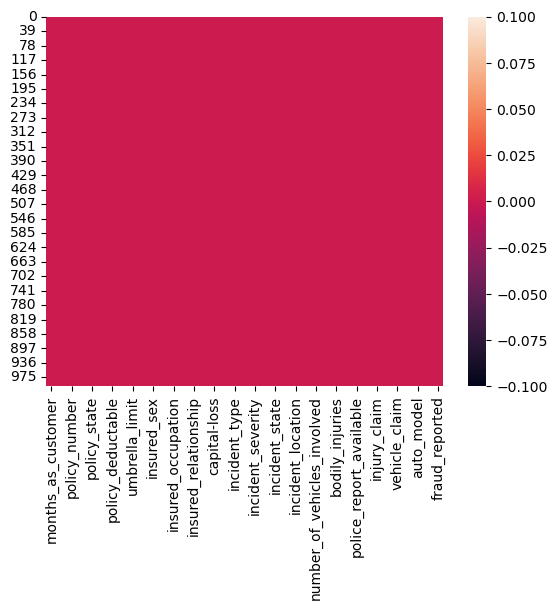

In [103]:
sns.heatmap(df.isnull())

<Axes: xlabel='property_damage', ylabel='count'>

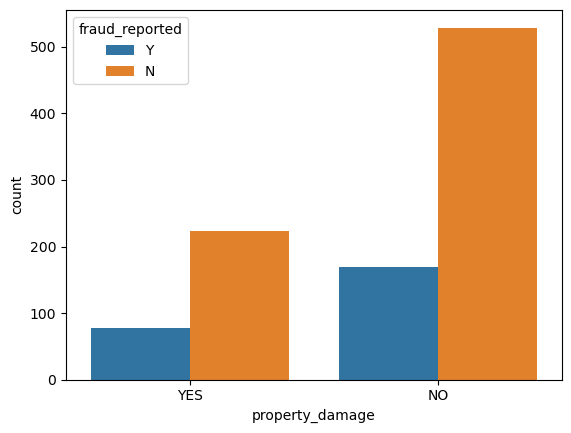

In [104]:
sns.countplot(hue="fraud_reported" , x="property_damage" , data=df)

<Axes: xlabel='number_of_vehicles_involved', ylabel='count'>

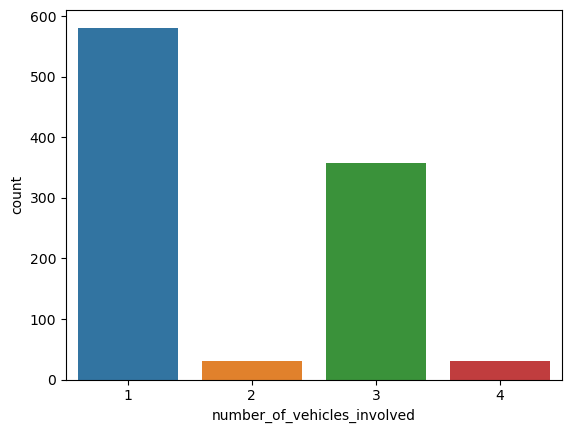

In [105]:
sns.countplot(x="number_of_vehicles_involved" , data=df)

<Axes: xlabel='incident_city', ylabel='count'>

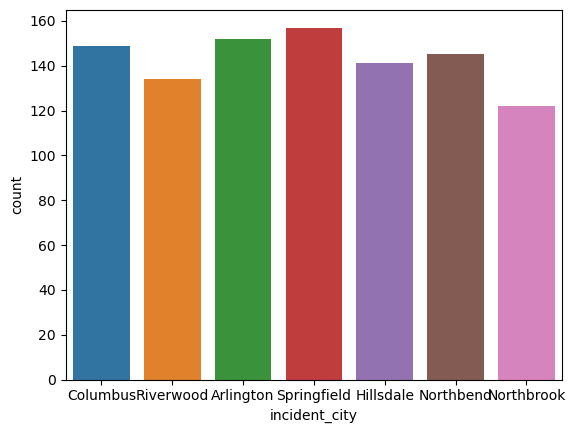

In [106]:
sns.countplot(x="incident_city" , data=df)

<Axes: xlabel='incident_state', ylabel='count'>

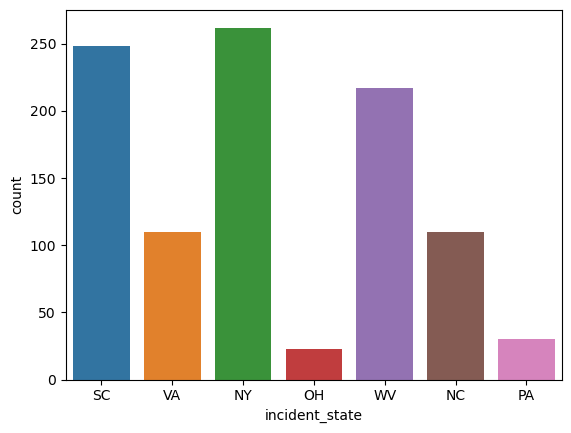

In [107]:
sns.countplot(x="incident_state" , data=df)

<Axes: xlabel='incident_state', ylabel='count'>

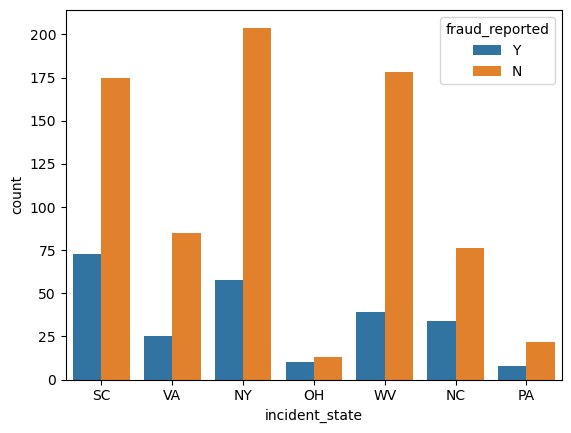

In [108]:
sns.countplot(x="incident_state" , hue="fraud_reported" , data=df)

<Axes: xlabel='insured_sex', ylabel='count'>

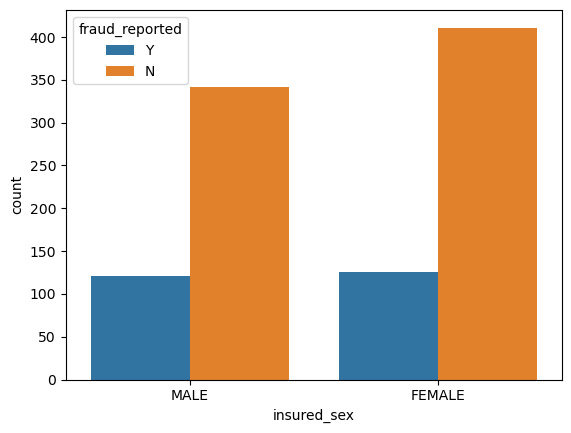

In [109]:
sns.countplot(x="insured_sex" , hue="fraud_reported" , data=df)

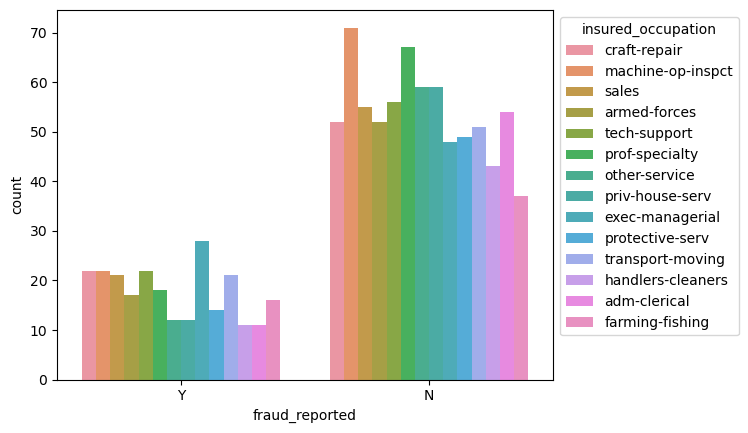

In [110]:
ccc = sns.countplot(hue="insured_occupation" , x="fraud_reported" , data=df)
sns.move_legend(ccc ,"upper left" , bbox_to_anchor=(1,1))

<Axes: xlabel='insured_education_level', ylabel='count'>

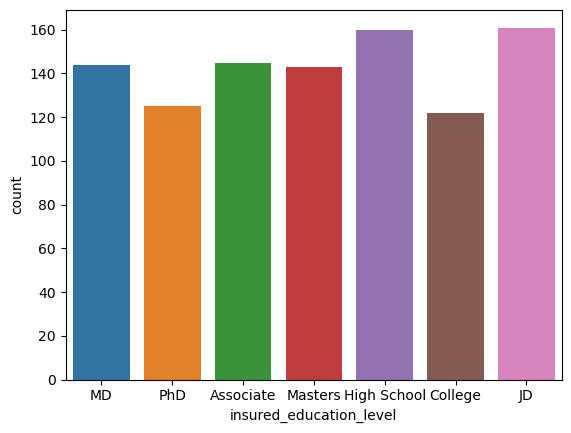

In [111]:
sns.countplot(x="insured_education_level" , data=df)

[Text(0, 0, 'Saab'),
 Text(1, 0, 'Mercedes'),
 Text(2, 0, 'Dodge'),
 Text(3, 0, 'Chevrolet'),
 Text(4, 0, 'Accura'),
 Text(5, 0, 'Nissan'),
 Text(6, 0, 'Audi'),
 Text(7, 0, 'Toyota'),
 Text(8, 0, 'Ford'),
 Text(9, 0, 'Suburu'),
 Text(10, 0, 'BMW'),
 Text(11, 0, 'Jeep'),
 Text(12, 0, 'Honda'),
 Text(13, 0, 'Volkswagen')]

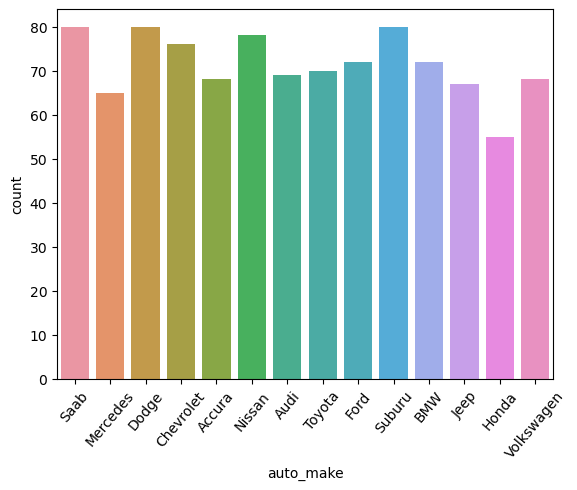

In [112]:
xa = sns.countplot(x="auto_make" , data=df )
xa.set_xticklabels(xa.get_xticklabels(), rotation=50 )

<Axes: xlabel='incident_severity', ylabel='count'>

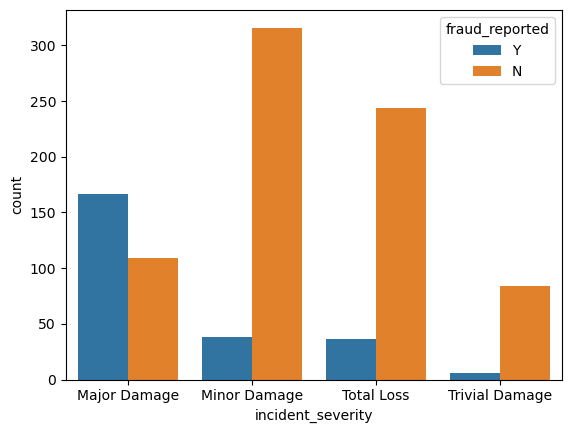

In [113]:
sns.countplot(x="incident_severity" , hue="fraud_reported" , data=df)

In [114]:
print(df.dtypes) , print("\n") , print(df.nunique())

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

(None, None, None)

In [115]:
df["fraud_reported"].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [116]:
df['fraud_reported'] = df["fraud_reported"].replace({"N":0 , "Y":1})

categorical column were we had N as NO and Y as Yes while replacing taken N as 0 and Y as 1.

In [117]:
df["fraud_reported"].value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

In [118]:
print(df.incident_date)

0      25-01-2015
1      21-01-2015
2      22-02-2015
3      10-01-2015
4      17-02-2015
          ...    
995    22-02-2015
996    24-01-2015
997    23-01-2015
998    26-02-2015
999    26-02-2015
Name: incident_date, Length: 1000, dtype: object


In [119]:
df.drop(["policy_bind_date"],axis=1 ,inplace=True)

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_state                 1000 non-null   object 
 4   policy_csl                   1000 non-null   object 
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   object 
 10  insured_education_level      1000 non-null   object 
 11  insured_occupation           1000 non-null   object 
 12  insured_hobbies              1000 non-null   object 
 13  insured_relationshi

In [121]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [122]:
data = df.select_dtypes(exclude=["int64" , "float64"])
for i in data:
    df[i] = le.fit_transform(df[i].astype(str))

Here we have converted the column with datatype as object is been converted as integer as numerical data works better in the prediction model we have used label encoder with loop to convert the data.
Further checked the datatypes of the columns which result as we have successfully converted the data.

In [123]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_state                     int32
policy_csl                       int32
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                      int32
insured_education_level          int32
insured_occupation               int32
insured_hobbies                  int32
insured_relationship             int32
capital-gains                    int64
capital-loss                     int64
incident_date                    int32
incident_type                    int32
collision_type                   int32
incident_severity                int32
authorities_contacted            int32
incident_state                   int32
incident_city                    int32
incident_location                int32
incident_hour_of_the_day         int64
number_of_vehicles_involv

In [124]:
pd.set_option("display.max_columns",None)

Checking out the numerical description of the data.

In [125]:
df.describe()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1.01400,0.951000,1136.000000,1256.406150,1.101000e+06,501214.488000,0.463000,2.966000,6.653000,9.731000,2.416000,25126.100000,-26793.700000,29.376000,1.172000,1.022000,1.184000,2.167000,3.242000,2.966000,499.500000,11.644000,1.83900,0.302000,0.992000,1.487000,0.314000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,19.318000,2005.103000,0.247000
std,115.113174,9.140287,257063.005276,0.83096,0.804516,611.864673,244.167395,2.297407e+06,71701.610941,0.498879,1.948497,4.019048,5.674049,1.681003,27872.187708,28104.096686,17.249875,1.081474,0.728043,0.939695,1.532142,2.155942,2.044266,288.819436,6.951373,1.01888,0.459355,0.820127,1.111335,0.464349,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,11.136107,6.015861,0.431483
min,0.000000,19.000000,100804.000000,0.00000,0.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-111100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,1995.000000,0.000000
25%,115.750000,32.000000,335980.250000,0.00000,0.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,1.000000,3.000000,5.000000,1.000000,0.000000,-51500.000000,14.750000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,249.750000,6.000000,1.00000,0.000000,0.000000,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,10.000000,2000.000000,0.000000
50%,199.500000,38.000000,533135.000000,1.00000,1.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,3.000000,7.000000,10.000000,2.000000,0.000000,-23250.000000,29.500000,1.000000,1.000000,1.000000,2.000000,4.000000,3.000000,499.500000,12.000000,1.00000,0.000000,1.000000,1.000000,0.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,20.000000,2005.000000,0.000000
75%,276.250000,44.000000,759099.750000,2.00000,2.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,1.000000,5.000000,10.000000,15.000000,4.000000,51025.000000,0.000000,44.000000,2.000000,2.000000,2.000000,4.000000,5.000000,5.000000,749.250000,17.000000,3.00000,1.000000,2.000000,2.000000,1.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,29.000000,2010.000000,0.000000
max,479.000000,64.000000,999435.000000,2.00000,2.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,1.000000,6.000000,13.000000,19.000000,5.000000,100500.000000,0.000000,59.000000,3.000000,2.000000,3.000000,4.000000,6.000000,6.000000,999.000000,23.000000,4.00000,1.000000,2.000000,3.000000,1.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,2015.000000,1.000000


In [126]:
df.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2,1,1000,1406.91,0,466132,1,4,2,17,0,53300,0,49,2,2,0,4,4,1,996,5,1,1,1,2,1,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,1,1,2000,1197.22,5000000,468176,1,4,6,15,2,0,0,41,3,1,1,4,5,5,628,8,1,0,0,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,687698,2,0,2000,1413.14,5000000,430632,0,6,11,2,3,35100,0,44,0,1,1,4,1,1,685,7,3,0,2,3,0,34650,7700,3850,23100,4,30,2007,0
3,256,41,227811,0,1,2000,1415.74,6000000,608117,0,6,1,2,4,48900,-62400,19,2,0,0,4,2,0,669,5,1,0,1,2,0,63400,6340,6340,50720,3,34,2014,1
4,228,44,367455,0,2,1000,1583.91,6000000,610706,1,0,11,2,4,66000,-46000,34,3,1,1,2,1,0,220,20,1,0,0,1,0,6500,1300,650,4550,0,31,2009,0


Splitting out the data into x and y for training and testing.

In [127]:
x = df.drop(["insured_zip" , "fraud_reported" , "incident_location" , "incident_date"],axis=1)
x

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,328,48,521585,2,1,1000,1406.91,0,1,4,2,17,0,53300,0,2,2,0,4,4,1,5,1,1,1,2,1,71610,6510,13020,52080,10,1,2004
1,228,42,342868,1,1,2000,1197.22,5000000,1,4,6,15,2,0,0,3,1,1,4,5,5,8,1,0,0,0,0,5070,780,780,3510,8,12,2007
2,134,29,687698,2,0,2000,1413.14,5000000,0,6,11,2,3,35100,0,0,1,1,4,1,1,7,3,0,2,3,0,34650,7700,3850,23100,4,30,2007
3,256,41,227811,0,1,2000,1415.74,6000000,0,6,1,2,4,48900,-62400,2,0,0,4,2,0,5,1,0,1,2,0,63400,6340,6340,50720,3,34,2014
4,228,44,367455,0,2,1000,1583.91,6000000,1,0,11,2,4,66000,-46000,3,1,1,2,1,0,20,1,0,0,1,0,6500,1300,650,4550,0,31,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,2,2,1000,1310.80,0,0,5,2,13,4,0,0,2,0,1,1,0,4,20,1,1,0,1,0,87200,17440,8720,61040,6,6,2006
996,285,41,186934,0,0,1000,1436.79,0,0,6,9,17,5,70900,0,2,1,0,1,4,3,23,1,1,2,3,0,108480,18080,18080,72320,13,28,2015
997,130,34,918516,2,1,500,1383.49,3000000,0,5,1,3,2,35100,0,0,2,1,4,0,0,4,3,0,2,3,1,67500,7500,7500,52500,11,19,1996
998,458,62,533940,0,2,2000,1356.92,5000000,1,0,5,0,5,0,0,2,1,0,3,1,0,2,1,0,0,1,1,46980,5220,5220,36540,1,5,1998


In [128]:
y = df["fraud_reported"]
y

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 1000, dtype: int64

In [129]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split( x , y ,test_size=0.20 , random_state=42)

In [130]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((800, 34), (200, 34), (800,), (200,))

In [131]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit( x_train , y_train)

LogisticRegression()

In [132]:
pred_lr = lr.predict(x_test)
sc_lr = accuracy_score(y_test , pred_lr)
sc_lr

0.725

In [133]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train , y_train)

RandomForestClassifier()

In [134]:
pred_rfc = rfc.predict(x_test)
sc_rfc = accuracy_score(y_test , pred_rfc)
sc_rfc

0.72

In [135]:
from sklearn.ensemble import GradientBoostingClassifier , AdaBoostClassifier
gbc = GradientBoostingClassifier()
abc = AdaBoostClassifier()

In [136]:
gbc.fit(x_train , y_train)

GradientBoostingClassifier()

In [137]:
pred_gbc = gbc.predict(x_test)
sc_gbc = accuracy_score(y_test , pred_gbc)
sc_gbc

0.765

In [138]:
abc.fit(x_train , y_train)

AdaBoostClassifier()

In [139]:
pred_abc = abc.predict(x_test)
sc_abc = accuracy_score(y_test , pred_abc)
sc_abc

0.785

In [140]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train , y_train)

DecisionTreeClassifier()

In [141]:
pred_dtc = dtc.predict(x_test)
sc_dtc = accuracy_score(y_test , pred_dtc)
sc_dtc

0.78

In [142]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train , y_train)

GaussianNB()

In [143]:
pred_gnb = gnb.predict(x_test)
sc_gnb = accuracy_score(y_test , pred_gnb)
sc_gnb

0.655

In [144]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train ,y_train)

SVC()

In [145]:
pred_svc = svc.predict(x_test)
sc_svc = accuracy_score(y_test , pred_svc)
sc_svc

0.725

In [146]:
df = pd.DataFrame({"MODEL":["Ada Boost Classifier" , "Gradient Boosting Classifier" , 
                            "Random Forest Classifier" , "Decision Tree Classifier" ,
                            "SVC" , "Gaussian NB" , "Logistic Regression"] ,  
                   "RESULTS":[sc_abc , sc_gbc , sc_rfc , sc_dtc , sc_svc , sc_gnb , sc_lr]})
df

,MODEL,RESULTS
0,Ada Boost Classifier,0.785
1,Gradient Boosting Classifier,0.765
2,Random Forest Classifier,0.720
3,Decision Tree Classifier,0.780
4,SVC,0.725
5,Gaussian NB,0.655
6,Logistic Regression,0.725


In [147]:
print(x)
print(y)

     months_as_customer  age  policy_number  policy_state  policy_csl  \
0                   328   48         521585             2           1   
1                   228   42         342868             1           1   
2                   134   29         687698             2           0   
3                   256   41         227811             0           1   
4                   228   44         367455             0           2   
..                  ...  ...            ...           ...         ...   
995                   3   38         941851             2           2   
996                 285   41         186934             0           0   
997                 130   34         918516             2           1   
998                 458   62         533940             0           2   
999                 456   60         556080             2           1   

     policy_deductable  policy_annual_premium  umbrella_limit  insured_sex  \
0                 1000                1406.91

In [148]:
data = (256,41,227811,0,1,2000,1415.74,6000000,0,6,1,2,4,48900,-62400,2,
         0,0,4,2,0,5,1,0,1,2,0,63400,6340,6340,50720,3,34,2014)
data_as_np_array = np.asarray(data)
data_reshaped = data_as_np_array.reshape(1,-1)
prediction = abc.predict(data_reshaped)
print(prediction)

[1]


In [149]:
if (prediction[0]==1):
    print("It is an Fraud Insurance Claim")
else:
    print("It is not an Fraud Insurance Claim")

It is an Fraud Insurance Claim


The prediction model is built with using classification models which is predicting if the insurance was fraudlent or not.
as per the input data in the model, Model is predicting person has claimed for insurance was fraud claim or it was not an fraud claim.
In the model we have used Ada Boost Classifier which is giving result of 0.785 which is best result and the second best result is coming from Decision Tree Classifier which is giving result of 0.780.
while we have used Ada Boost Classifier in the model.

# Zomato Restaurant

In [150]:
open('zomato.csv', encoding='latin-1')

<_io.TextIOWrapper name='zomato.csv' mode='r' encoding='latin-1'>

In [151]:
df = pd.read_csv("zomato.csv",encoding="latin-1")

In [152]:
df.shape

(9551, 21)

we have dataset of zomato which have 9551 number of rows and 21 number of columns from which Price range is the output variable and rest for the column have deatil like name of restaurant there ID address, city , there rating and which kind of services the restaurant is providing and restaurant have which kind of cuisine served.

In [153]:
print("Number of Rows are ",df.shape[0])
print("Number of Columns are ",df.shape[1])

Number of Rows are  9551
Number of Columns are  21


In [154]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [155]:
df.sample(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
8042,3695,Geoffrey's,1,Noida,"16-A, Centre Stage Mall, Sector 18, Noida","Centre Stage Mall, Sector 18","Centre Stage Mall, Sector 18, Noida",77.323156,28.568121,"Asian, Continental, Italian, North Indian",2600,Indian Rupees(Rs.),Yes,No,No,No,4,3.0,Orange,Average,579
6686,306410,Otik Cake Shop,1,New Delhi,"Shop 2, J-12/22, Rajouri Garden, New Delhi",Rajouri Garden,"Rajouri Garden, New Delhi",77.120310,28.640489,"Bakery, Desserts, Fast Food",250,Indian Rupees(Rs.),No,Yes,No,No,1,3.8,Yellow,Good,166
1092,18294253,The Baking Treats N More,1,Faridabad,"383, Sector 9, Faridabad",Sector 9,"Sector 9, Faridabad",0.000000,0.000000,Bakery,300,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,0
7546,312319,Bonitos Blu - The Uppal,1,New Delhi,"The Uppal, NH-8, Near, Aerocity, New Delhi","The Uppal, Aerocity","The Uppal, Aerocity, New Delhi",77.101847,28.535183,"North Indian, Asian, Continental",2500,Indian Rupees(Rs.),Yes,No,No,No,4,3.0,Orange,Average,5
2346,101311,Taruveda Bistro,1,Jaipur,"1st Floor, Sunraj Villa, 2 Mysore House, Jacob...",Civil Lines,"Civil Lines, Jaipur",75.789034,26.911378,"Cafe, Italian, Japanese, Continental",1000,Indian Rupees(Rs.),No,Yes,No,No,3,4.2,Green,Very Good,633


In [156]:
df.tail()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,80,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901
9550,5927402,Walter's Coffee Roastery,208,ÛÁstanbul,"CafeaÛôa Mahallesi, BademaltÛ± Sokak, No 21/B,...",Moda,"Moda, ÛÁstanbul",29.026016,40.984776,Cafe,55,Turkish Lira(TL),No,No,No,No,2,4.0,Green,Very Good,591


In [157]:
list(df.columns)

['Restaurant ID',
 'Restaurant Name',
 'Country Code',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Longitude',
 'Latitude',
 'Cuisines',
 'Average Cost for two',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Price range',
 'Aggregate rating',
 'Rating color',
 'Rating text',
 'Votes']

In [158]:
print(df["Average Cost for two"])

0       1100
1       1200
2       4000
3       1500
4       1500
        ... 
9546      80
9547     105
9548     170
9549     120
9550      55
Name: Average Cost for two, Length: 9551, dtype: int64


In [159]:
print(df["Price range"])

0       3
1       3
2       4
3       4
4       4
       ..
9546    3
9547    3
9548    4
9549    4
9550    2
Name: Price range, Length: 9551, dtype: int64


In [160]:
df["Price range"].value_counts()

1    4444
2    3113
3    1408
4     586
Name: Price range, dtype: int64

Finding out the value count of the each columns.

In [161]:
for i in df.columns:
    print(df[i].value_counts())
    print("**************************************")

6317637     1
18254520    1
18462589    1
18336474    1
18336477    1
           ..
313059      1
763         1
7557        1
525         1
5927402     1
Name: Restaurant ID, Length: 9551, dtype: int64
**************************************
Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
Odeon Social                 1
Johnny Rockets               1
House of Commons             1
HotMess                      1
Walter's Coffee Roastery     1
Name: Restaurant Name, Length: 7446, dtype: int64
**************************************
1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: Country Code, dtype: int64
**************************************
New Delhi           5473
Gurgaon             1118
Noida               1080
Fa

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [163]:
df.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
dtype: int64

As we check there is no missing values present in the dataset.

In [164]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [165]:
df["Cuisines"].value_counts()

North Indian                                             936
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: Cuisines, Length: 1825, dtype: int64

In [166]:
df.duplicated().sum()

0

<Axes: xlabel='Price range', ylabel='count'>

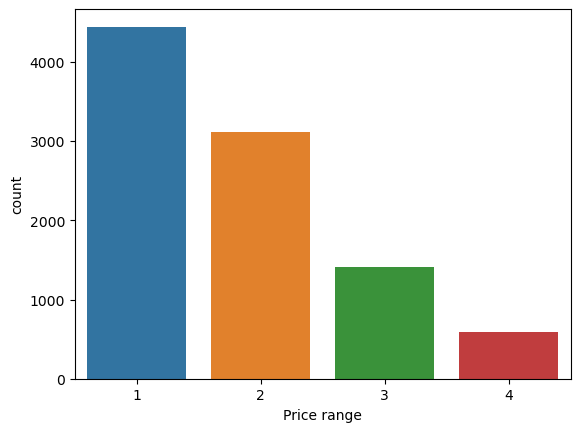

In [167]:
sns.countplot(data=df , x="Price range" ) 

<Axes: xlabel='Price range', ylabel='count'>

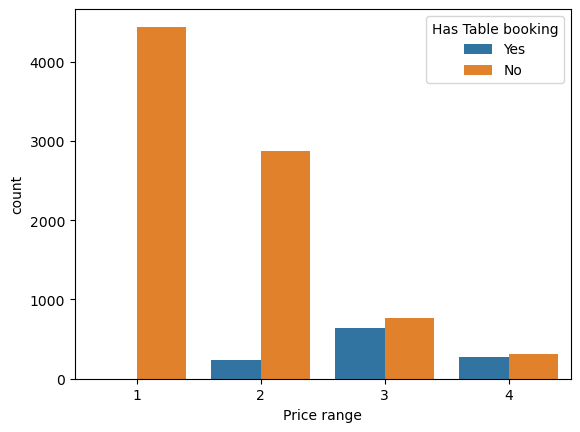

In [168]:
sns.countplot(x="Price range" , hue="Has Table booking" , data=df)

<Axes: xlabel='Price range', ylabel='count'>

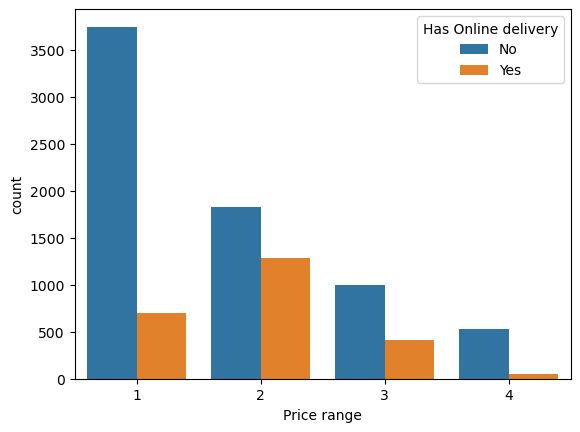

In [169]:
sns.countplot(x="Price range" , hue="Has Online delivery" , data=df)

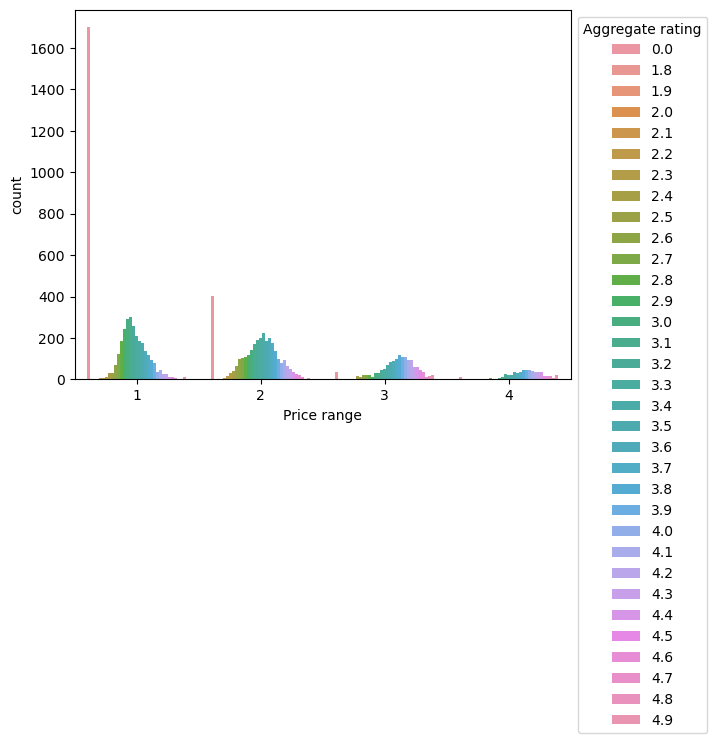

In [170]:
ccc = sns.countplot(hue="Aggregate rating" , x="Price range" , data=df )
sns.move_legend(ccc ,"upper left" , bbox_to_anchor=(1,1))

<Axes: xlabel='Price range', ylabel='count'>

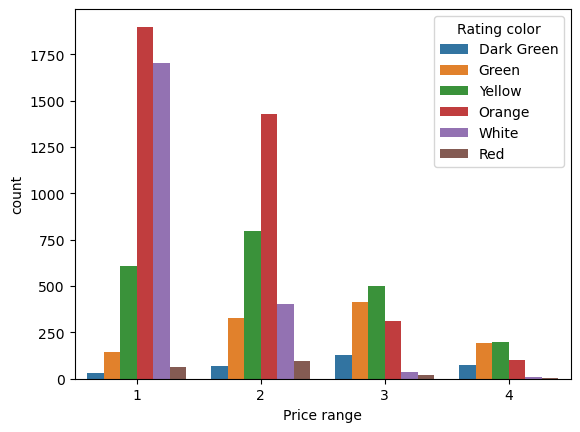

In [171]:
sns.countplot(x="Price range" , hue="Rating color" , data=df)

<Axes: xlabel='Price range', ylabel='count'>

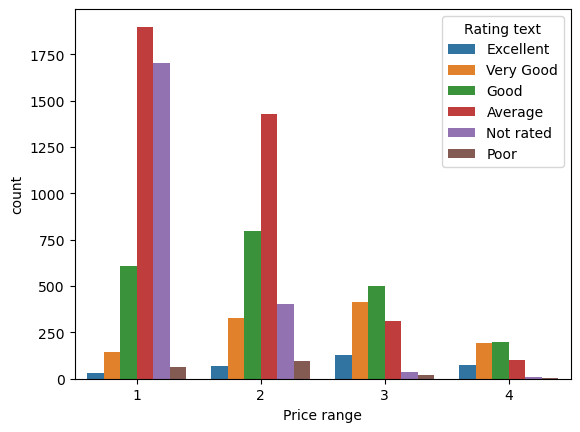

In [172]:
sns.countplot(x="Price range" , hue="Rating text" , data=df)

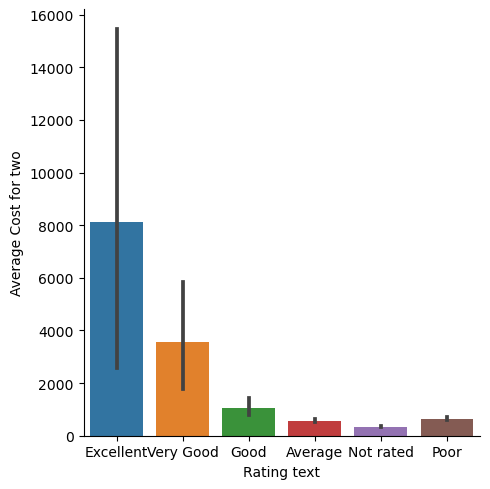

In [173]:
sns.catplot(y='Average Cost for two' , x="Rating text" ,data=df , kind="bar")

Restaurant ID              Axes(0.125,0.53;0.133621x0.35)
Country Code            Axes(0.285345,0.53;0.133621x0.35)
Longitude                Axes(0.44569,0.53;0.133621x0.35)
Latitude                Axes(0.606034,0.53;0.133621x0.35)
Average Cost for two    Axes(0.766379,0.53;0.133621x0.35)
Price range                Axes(0.125,0.11;0.133621x0.35)
Aggregate rating        Axes(0.285345,0.11;0.133621x0.35)
Votes                    Axes(0.44569,0.11;0.133621x0.35)
dtype: object

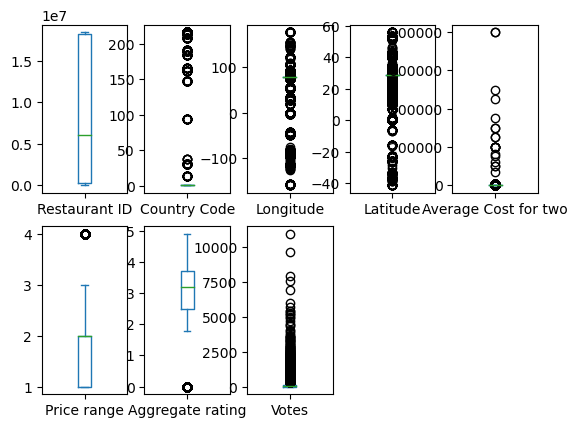

In [174]:
df.plot(kind="box" , subplots=True , layout=(2,5))

In [175]:
df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [176]:
df.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
dtype: int64

encoding the data into numerical data using label encoder we have converted the datatypes of the column which were reflecting as object datatype.

In [177]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [178]:
data = df.select_dtypes(exclude=["int64" , "float64"])
for i in data:
    df[i] = le.fit_transform(df[i].astype(str))

In [179]:
df.dtypes

Restaurant ID             int64
Restaurant Name           int32
Country Code              int64
City                      int32
Address                   int32
Locality                  int32
Locality Verbose          int32
Longitude               float64
Latitude                float64
Cuisines                  int32
Average Cost for two      int64
Currency                  int32
Has Table booking         int32
Has Online delivery       int32
Is delivering now         int32
Switch to order menu      int32
Price range               int64
Aggregate rating        float64
Rating color              int32
Rating text               int32
Votes                     int64
dtype: object

In [180]:
for i in df.columns:
    print(df[i].value_counts())
    print("************************************************************")

6317637     1
18254520    1
18462589    1
18336474    1
18336477    1
           ..
313059      1
763         1
7557        1
525         1
5927402     1
Name: Restaurant ID, Length: 9551, dtype: int64
************************************************************
1099    83
2099    79
6106    63
2717    51
4077    48
        ..
4653     1
3264     1
3025     1
3001     1
7240     1
Name: Restaurant Name, Length: 7446, dtype: int64
************************************************************
1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: Country Code, dtype: int64
************************************************************
88     5473
50     1118
89     1080
43      251
48       25
       ... 
93        1
78        1
77        1
71        1
133       1
Name: City, Length: 141, dtype: int64
************************************************************


In [181]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

<Axes: >

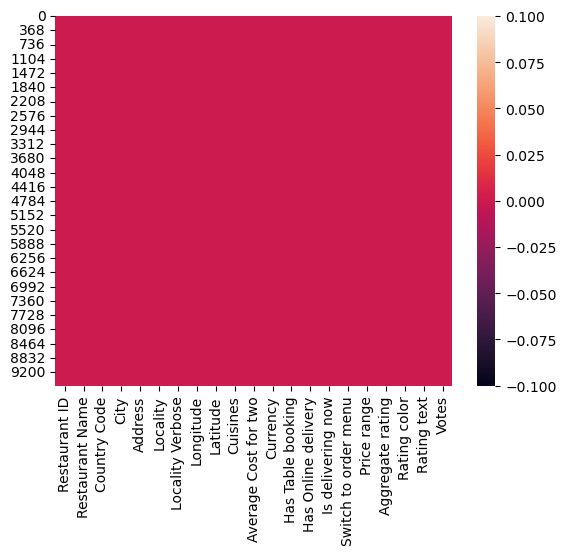

In [182]:
sns.heatmap(df.isnull())

Numerical description of the dataset.

In [183]:
df.describe()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.00000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.0,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,3653.204586,18.365616,78.301434,4542.439430,658.128468,677.304994,64.126574,25.854381,989.95079,1199.210763,3.977699,0.121244,0.256622,0.003560,0.0,1.804837,2.666370,2.952885,1.788713,156.909748
std,8.791521e+06,2142.917876,56.750546,23.198915,2565.717005,315.866515,331.727449,41.467058,11.007935,514.72354,16121.183073,0.914242,0.326428,0.436792,0.059561,0.0,0.905609,1.516378,1.493048,1.694637,430.169145
min,5.300000e+01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-157.948486,-41.330428,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3.019625e+05,1777.500000,1.000000,76.000000,2323.500000,381.000000,387.000000,77.081343,28.478713,497.00000,250.000000,4.000000,0.000000,0.000000,0.000000,0.0,1.000000,2.500000,2.000000,0.000000,5.000000
50%,6.004089e+06,3595.000000,1.000000,88.000000,4610.000000,696.000000,707.000000,77.191964,28.570469,1127.00000,400.000000,4.000000,0.000000,0.000000,0.000000,0.0,2.000000,3.200000,2.000000,2.000000,31.000000
75%,1.835229e+07,5485.500000,1.000000,88.000000,6746.500000,921.000000,953.000000,77.282006,28.642758,1355.00000,700.000000,4.000000,0.000000,1.000000,0.000000,0.0,2.000000,3.700000,4.000000,3.000000,131.000000
max,1.850065e+07,7445.000000,216.000000,140.000000,8917.000000,1207.000000,1264.000000,174.832089,55.976980,1825.00000,800000.000000,11.000000,1.000000,1.000000,1.000000,0.0,4.000000,4.900000,5.000000,5.000000,10934.000000


In [184]:
pd.set_option("display.max_columns" , None)

# MODEL BUILT TAKING TARGET AS "PRICE RANGE"

splitting the data into x and y for training and testing.

In [185]:
x = df.drop(["Price range" , "Votes" , "Switch to order menu" , "Restaurant Name" , "Restaurant ID" , "Address" , "Cuisines"], axis=1)
x

,Country Code,City,Locality,Locality Verbose,Longitude,Latitude,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Aggregate rating,Rating color,Rating text
0,162,73,171,172,121.027535,14.565443,1100,0,1,0,0,4.8,0,1
1,162,73,593,601,121.014101,14.553708,1200,0,1,0,0,4.5,0,1
2,162,75,308,314,121.056831,14.581404,4000,0,1,0,0,4.4,1,5
3,162,75,862,875,121.056475,14.585318,1500,0,0,0,0,4.9,0,1
4,162,75,862,875,121.057508,14.584450,1500,0,1,0,0,4.8,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,208,140,517,523,28.977392,41.022793,80,11,0,0,0,4.1,1,5
9547,208,140,552,558,29.041297,41.009847,105,11,0,0,0,4.2,1,5
9548,208,140,554,561,29.034640,41.055817,170,11,0,0,0,3.7,5,2
9549,208,140,554,561,29.036019,41.057979,120,11,0,0,0,4.0,1,5


In [186]:
y = df["Price range"]
y

0       3
1       3
2       4
3       4
4       4
       ..
9546    3
9547    3
9548    4
9549    4
9550    2
Name: Price range, Length: 9551, dtype: int64

In [187]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split( x , y , test_size=0.20 , random_state=42)

In [188]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((7640, 14), (1911, 14), (7640,), (1911,))

In [189]:
from sklearn import metrics

In [190]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train , y_train)

LinearRegression()

In [191]:
pred_lr = lr.predict(x_test)
pred_lr

array([1.619744  , 2.13573733, 1.56711104, ..., 1.55628154, 2.33506682,
       2.28840637])

In [192]:
sc_lr = metrics.r2_score(y_test , pred_lr)
sc_lr

0.4707586722929926

In [193]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit (x_train , y_train)

RandomForestRegressor()

In [194]:
pred_rfr = rfr.predict(x_test)
sc_rfr = metrics.r2_score(y_test , pred_rfr)
sc_rfr

0.9827138906140659

In [195]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit (x_train , y_train)

GradientBoostingRegressor()

In [196]:
pred_gbr = gbr.predict(x_test)
sc_gbr = metrics.r2_score(y_test , pred_gbr)
sc_gbr

0.9662983602912439

In [197]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit (x_train , y_train)

DecisionTreeRegressor()

In [198]:
pred_dtr = dtr.predict(x_test)
sc_dtr = metrics.r2_score(y_test , pred_dtr)
sc_dtr

0.979602959492102

In [199]:
from sklearn.neighbors import KNeighborsRegressor
kn = KNeighborsRegressor()
kn.fit (x_train , y_train)

KNeighborsRegressor()

In [200]:
pred_kn = kn.predict(x_test)
sc_kn = metrics.r2_score (y_test , pred_kn)
sc_kn

0.9182843564652334

In [201]:
from sklearn.linear_model import Lasso
ll = Lasso()
ll.fit(x_train, y_train)

Lasso()

In [202]:
pred_ll = ll.predict(x_test)
sc_ll = metrics.r2_score(y_test , pred_ll)
sc_ll

0.10945290846560529

In [203]:
from sklearn.linear_model import Ridge
rr = Ridge()
rr.fit(x_train , y_train)

Ridge()

In [204]:
pred_rr = rr.predict(x_test)
sc_rr = metrics.r2_score(y_test , pred_rr)
sc_rr

0.47071763025418456

In [205]:
data = pd.DataFrame({"MODEL":["Ridge" , "Lasso" , "KNeighbors Regressor" , "Decision Tree Regressor" , 
                            "Gradient Boosting Regressor" , "Random Forest Regressor" , "Linear Regression"],
                   "RESULTS":[sc_rr , sc_ll , sc_kn , sc_dtr , sc_gbr , sc_rfr , sc_lr]})
data

,MODEL,RESULTS
0,Ridge,0.470718
1,Lasso,0.109453
2,KNeighbors Regressor,0.918284
3,Decision Tree Regressor,0.979603
4,Gradient Boosting Regressor,0.966298
5,Random Forest Regressor,0.982714
6,Linear Regression,0.470759


In [206]:
print(x)
print(y)

      Country Code  City  Locality  Locality Verbose   Longitude   Latitude  \
0              162    73       171               172  121.027535  14.565443   
1              162    73       593               601  121.014101  14.553708   
2              162    75       308               314  121.056831  14.581404   
3              162    75       862               875  121.056475  14.585318   
4              162    75       862               875  121.057508  14.584450   
...            ...   ...       ...               ...         ...        ...   
9546           208   140       517               523   28.977392  41.022793   
9547           208   140       552               558   29.041297  41.009847   
9548           208   140       554               561   29.034640  41.055817   
9549           208   140       554               561   29.036019  41.057979   
9550           208   140       670               681   29.026016  40.984776   

      Average Cost for two  Currency  Has Table boo

In [207]:
data = (162,75,308,314,121.056831,14.581404,
        4000,0,1,0,0,4.4,1,5)
data_as_np_array = np.asarray(data)
data_reshaped = data_as_np_array.reshape(1,-1)
prediction = rfr.predict(data_reshaped)
print("Price Range for this Resturant is " ,prediction)

Price Range for this Resturant is  [3.99]


In the prediction model we have used used regressor models to get result as data was categorical,
in model we have used Random Forest Regressor which is giving result of 0.982714 which the best result received while using many regressor model and the second best result is received from Decision Tree Regressor which is giving result of 0.979603,
while using Random Forest Regressor model is successfully predicting the price range of the restaurant as per the data input in the prediction model.

# M0DEL BUILT TAKING TARGET AS "Average Cost for two"

In [208]:
df = pd.read_csv("zomato.csv",encoding="latin-1")

we have dataset of zomato which have 9551 number of rows and 21 number of columns from which Average Cost for two is the output variable and rest for the column have deatil like name of restaurant there ID address, city , there rating and which kind of services the restaurant is providing and restaurant have which kind of cuisine served.

In [209]:
df.shape

(9551, 21)

In [210]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [211]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

dropping the columns which are not helpful for the model which may result as overfitting.

In [212]:
df.drop(["Restaurant ID" , "Is delivering now"] , axis=1 , inplace=True)

As the dataset is of zomato which is an indian company where 90% of data is from india remaining which can be dropped here we have only taking the data of India which is showing code as 1 in the dataset.

In [213]:
df['Country Code'].value_counts()

1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: Country Code, dtype: int64

In [214]:
mask = df['Country Code']==1
df=df[mask]

Post dropping the data of rest of the country we can see now we have 8652 rows and 19 columns.

In [215]:
df.shape

(8652, 19)

In [216]:
df.drop(["Country Code" , "Currency"], axis=1, inplace=True)

dropping the columns which are not helpful for the model which may result as overfitting.

In [217]:
df["City"].nunique()

43

as most of the data is coming from 03 major cities we will those city for further processing and rest can be dropped we have considered city are New Delhi result of 5473 , Gurgaon result of 1118 and Noida result of 1080

In [218]:
df["City"].value_counts() 

New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Ahmedabad         21
Guwahati          21
Lucknow           21
Bhubaneshwar      21
Amritsar          21
Pune              20
Puducherry        20
Patna             20
Ludhiana          20
Ranchi            20
Surat             20
Vadodara          20
Nashik            20
Nagpur            20
Mysore            20
Mumbai            20
Varanasi          20
Mangalore         20
Agra              20
Kochi             20
Kolkata           20
Dehradun          20
Allahabad         20
Aurangabad        20
Bangalore         20
Bhopal            20
Chennai           20
Coimbatore        20
Goa               20
Indore            20
Jaipur            20
Kanpur            20
Vizag             20
Chandigarh        18
Hyderabad         18
Secunderabad       2
Panchkula          1
Mohali             1
Name: City, dtype: int64

In [219]:
mask =df["City"].isin(["New Delhi" , "Gurgaon" , "Noida"])
df = df[mask]

Post dropping the data of rest of the City we can see now we have 7671 rows and 17 columns.

In [220]:
df.shape

(7671, 17)

In [221]:
df["Restaurant Name"].value_counts()

Cafe Coffee Day         81
Domino's Pizza          75
Subway                  60
Green Chick Chop        47
McDonald's              44
                        ..
Sahni Chicken Corner     1
Rewari Sweets            1
Pindi's Kitchen          1
Nagi Fish Corner         1
The Grand                1
Name: Restaurant Name, Length: 5834, dtype: int64

Extracting value counts of each columns from the dataset.

In [222]:
for i in df.columns:
    print(df[i].value_counts())
    print("*****************************************************")

Cafe Coffee Day         81
Domino's Pizza          75
Subway                  60
Green Chick Chop        47
McDonald's              44
                        ..
Sahni Chicken Corner     1
Rewari Sweets            1
Pindi's Kitchen          1
Nagi Fish Corner         1
The Grand                1
Name: Restaurant Name, Length: 5834, dtype: int64
*****************************************************
New Delhi    5473
Gurgaon      1118
Noida        1080
Name: City, dtype: int64
*****************************************************
Dilli Haat, INA, New Delhi                                             11
Sector 41, Noida                                                       11
Greater Kailash (GK) 1, New Delhi                                      10
The Imperial, Janpath, New Delhi                                        9
Palate of Delhi, Dhaula Kuan Metro Station, Chanakyapuri, New Delhi     8
                                                                       ..
27/1, Ashok Nagar, Dou

In [223]:
df.drop(["Restaurant Name" , "Address" , "Locality" , "Locality Verbose" ,"Rating text" ,"Rating color"],axis=1,inplace=True)

In [224]:
df.drop(["Switch to order menu"],axis=1,inplace=True)

dropping the columns which are not helpful for the model which may result as overfitting.

In [225]:
df["Has Table booking"] = df["Has Table booking"].replace({"Yes":1 , "No":0})

categorical is converted into numerical data here we have replaced yes as 1 and no as 0

In [226]:
df["Has Table booking"].value_counts()

0    6640
1    1031
Name: Has Table booking, dtype: int64

In [227]:
df['Has Online delivery'] = df["Has Online delivery"].replace({"Yes":1 , "No":0})

categorical is converted into numerical data here we have replaced yes as 1 and no as 0

In [228]:
df["Has Online delivery"].value_counts()

0    5393
1    2278
Name: Has Online delivery, dtype: int64

In [229]:
df.columns

Index(['City', 'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two',
       'Has Table booking', 'Has Online delivery', 'Price range',
       'Aggregate rating', 'Votes'],
      dtype='object')

finding out the correlation of the data with output variable.
where we can see longitude , latitude and Has Online delivery are not helpful for the target as its giving results in 0.0
and price range is giving result more than 0.5 which is 0.8 hence this also need to drop further we have dropped this columns.

In [230]:
df.corr()["Average Cost for two"]

Longitude               0.071854
Latitude                0.070816
Average Cost for two    1.000000
Has Table booking       0.643845
Has Online delivery     0.072198
Price range             0.848425
Aggregate rating        0.329785
Votes                   0.297741
Name: Average Cost for two, dtype: float64

In [231]:
df.drop(["Longitude" , "Latitude" , "Has Online delivery" , "Price range"],axis=1,inplace=True)

dropping the columns which are not helpful for the model which may result as overfitting.

In [232]:
df

,City,Cuisines,Average Cost for two,Has Table booking,Aggregate rating,Votes
1161,Gurgaon,"Cafe, Beverages",350,0,3.4,16
1162,Gurgaon,"North Indian, Mughlai",800,1,2.7,80
1163,Gurgaon,"North Indian, Mughlai",2000,1,4.3,1887
1164,Gurgaon,"South Indian, Seafood, Kerala",1400,1,4.0,802
1165,Gurgaon,Bakery,250,0,3.0,4
...,...,...,...,...,...,...
9108,Noida,"North Indian, Chinese",700,0,2.6,34
9109,Noida,Fast Food,400,0,0.0,1
9110,Noida,Fast Food,600,0,0.0,3
9111,Noida,"North Indian, Chinese",500,0,0.0,0


In [233]:
cuisine = df.groupby('Cuisines')["Average Cost for two"].mean().reset_index()
cuisine

,Cuisines,Average Cost for two
0,Afghani,512.500000
1,"Afghani, Mughlai, Chinese",500.000000
2,"Afghani, North Indian",900.000000
3,"Afghani, North Indian, Pakistani, Arabian",500.000000
4,American,666.666667
...,...,...
1138,"Tibetan, Street Food",100.000000
1139,Turkish,600.000000
1140,"Turkish, Arabian, Moroccan, Lebanese",400.000000
1141,"Turkish, Mediterranean, Middle Eastern",2000.000000


finding out the mean of the column with the target variable and reseting the index of the columns and the result is added in the dataset and the old Cuisine column is dropped.

In [234]:
new_df = df.merge(cuisine, on="Cuisines")

In [235]:
new_df.drop(["Cuisines"],axis=1 , inplace=True)

In [236]:
new_df

,City,Average Cost for two_x,Has Table booking,Aggregate rating,Votes,Average Cost for two_y
0,Gurgaon,350,0,3.4,16,416.666667
1,New Delhi,200,0,0.0,0,416.666667
2,New Delhi,700,0,4.1,92,416.666667
3,Gurgaon,800,1,2.7,80,755.511551
4,Gurgaon,2000,1,4.3,1887,755.511551
...,...,...,...,...,...,...
7666,Noida,2500,1,2.2,116,2500.000000
7667,Noida,200,0,3.0,10,200.000000
7668,Noida,450,0,3.5,105,450.000000
7669,Noida,1000,1,0.0,0,1000.000000


In [237]:
new_df.rename(columns={"Average Cost for two_x":"cost" , "Average Cost for two_y":"cuisine"},inplace=True)

Renaming the column name Average Cost for two_x which was already part of the dataset has been renamed as cost which is now the target variable and mean of the cuisine column which we have added Average Cost for two_y has been renamed as Cuisine.
further we have encoded city columns into an numerical column.

In [238]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [239]:
encode = le.fit_transform(new_df["City"])

In [240]:
new_df["City"]=encode

In [241]:
new_df

,City,cost,Has Table booking,Aggregate rating,Votes,cuisine
0,0,350,0,3.4,16,416.666667
1,1,200,0,0.0,0,416.666667
2,1,700,0,4.1,92,416.666667
3,0,800,1,2.7,80,755.511551
4,0,2000,1,4.3,1887,755.511551
...,...,...,...,...,...,...
7666,2,2500,1,2.2,116,2500.000000
7667,2,200,0,3.0,10,200.000000
7668,2,450,0,3.5,105,450.000000
7669,2,1000,1,0.0,0,1000.000000


In [242]:
new_df["City"].value_counts()

1    5473
0    1118
2    1080
Name: City, dtype: int64

splitting the data into x1 and y1 for training and testing.

In [243]:
x1 = new_df.drop(["cost"],axis=1)
x1

,City,Has Table booking,Aggregate rating,Votes,cuisine
0,0,0,3.4,16,416.666667
1,1,0,0.0,0,416.666667
2,1,0,4.1,92,416.666667
3,0,1,2.7,80,755.511551
4,0,1,4.3,1887,755.511551
...,...,...,...,...,...
7666,2,1,2.2,116,2500.000000
7667,2,0,3.0,10,200.000000
7668,2,0,3.5,105,450.000000
7669,2,1,0.0,0,1000.000000


In [244]:
y1=new_df["cost"]
y1

0        350
1        200
2        700
3        800
4       2000
        ... 
7666    2500
7667     200
7668     450
7669    1000
7670     450
Name: cost, Length: 7671, dtype: int64

In [245]:
from sklearn.model_selection import train_test_split
x1_train , x1_test , y1_train , y1_test = train_test_split( x1 , y1 , test_size=0.25 , random_state=42)

In [246]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
lr1 = LinearRegression()
lr1.fit(x1_train , y1_train)

LinearRegression()

In [247]:
pred_lr1 = lr1.predict(x1_test)
sc_lr1 = metrics.r2_score(y1_test , pred_lr1)
sc_lr1

0.7422363825141777

In [248]:
from sklearn.ensemble import RandomForestRegressor
rfr1 = RandomForestRegressor()
rfr1.fit(x1_train , y1_train)

RandomForestRegressor()

In [249]:
pred_rfr1 = rfr1.predict(x1_test)
sc_rfr1 = metrics.r2_score(y1_test , pred_rfr1)
sc_rfr1

0.7083522065525061

In [250]:
from sklearn.tree import DecisionTreeRegressor
dtr1 = DecisionTreeRegressor()
dtr1.fit(x1_train , y1_train)

DecisionTreeRegressor()

In [251]:
pred_dtr1 = dtr1.predict(x1_test)
sc_dtr1 = metrics.r2_score(y1_test , pred_dtr1)
sc_dtr1

0.5603741050737236

In [252]:
from sklearn.linear_model import Lasso , Ridge
ll1 = Lasso()
ll1.fit(x1_train , y1_train)

Lasso()

In [253]:
pred_ll1 = ll1.predict(x1_test)
sc_ll1 = metrics.r2_score(y1_test , pred_ll1)
sc_ll1

0.7428993762345155

In [254]:
rr1 = Ridge()
rr1.fit(x1_train , y1_train)

Ridge()

In [255]:
pred_rr1 = rr1.predict(x1_test)
sc_rr1 = metrics.r2_score(y1_test , pred_rr1)
sc_rr1

0.7422796276590478

In [256]:
from sklearn.ensemble import GradientBoostingRegressor
gbr1 = GradientBoostingRegressor()
gbr1.fit(x1_train , y1_train)

GradientBoostingRegressor()

In [257]:
pred_gbr1 = gbr1.predict(x1_test)
sc_gbr1 = metrics.r2_score(y1_test , pred_gbr1)
sc_gbr1

0.7445453972934455

In [258]:
from sklearn.tree import ExtraTreeRegressor
etr1 = ExtraTreeRegressor()
etr1.fit(x1_train , y1_train)

ExtraTreeRegressor()

In [259]:
pred_etr1 = etr1.predict(x1_test)
sc_etr1 = metrics.r2_score(y1_test , pred_etr1)
sc_etr1

0.41265341691128476

In [260]:
from sklearn.svm import SVR
svr1 = SVR()
svr1.fit(x1_train , y1_train)

SVR()

In [261]:
pred_svr1 = svr1.predict(x1_test)
sc_svr1 = metrics.r2_score(y1_test , pred_svr1)
sc_svr1

0.3216515069038839

In [262]:
from sklearn.neighbors import KNeighborsRegressor
knr1 = KNeighborsRegressor()
knr1.fit(x1_train , y1_train)

KNeighborsRegressor()

In [263]:
pred_knr1 = knr1.predict(x1_test)
sc_knr1 = metrics.r2_score(y1_test , pred_knr1)
sc_knr1

0.6140358448522176

In [264]:
from sklearn.ensemble import AdaBoostRegressor
abr1 = AdaBoostRegressor()
abr1.fit(x1_train , y1_train)

AdaBoostRegressor()

In [265]:
pred_abr1 = abr1.predict(x1_test)
sc_abr1 = metrics.r2_score(y1_test , pred_abr1)
sc_abr1

0.30795804570676166

In [266]:
df2 = pd.DataFrame({"MODEL":["KNeighbors Regressor" , "SVR" , "Extra Tree Regressor" , "Gradient Boosting Regressor",
                             "Lasso" , "Ridge" , "Decision Tree Regressor" , "Random Forest Regressor",
                             "Linear Regression" , "Ada Boost Regressor"],
                    "RESULTS":[sc_knr1 , sc_svr1 , sc_etr1 , sc_gbr1 , sc_ll1 , sc_rr1 , sc_dtr1 , sc_rfr1 , sc_lr1 , sc_abr1]})
df2

,MODEL,RESULTS
0,KNeighbors Regressor,0.614036
1,SVR,0.321652
2,Extra Tree Regressor,0.412653
3,Gradient Boosting Regressor,0.744545
4,Lasso,0.742899
5,Ridge,0.742280
6,Decision Tree Regressor,0.560374
7,Random Forest Regressor,0.708352
8,Linear Regression,0.742236
9,Ada Boost Regressor,0.307958


In [267]:
print(x1)
print(y1)

      City  Has Table booking  Aggregate rating  Votes      cuisine
0        0                  0               3.4     16   416.666667
1        1                  0               0.0      0   416.666667
2        1                  0               4.1     92   416.666667
3        0                  1               2.7     80   755.511551
4        0                  1               4.3   1887   755.511551
...    ...                ...               ...    ...          ...
7666     2                  1               2.2    116  2500.000000
7667     2                  0               3.0     10   200.000000
7668     2                  0               3.5    105   450.000000
7669     2                  1               0.0      0  1000.000000
7670     2                  0               2.0    161   450.000000

[7671 rows x 5 columns]
0        350
1        200
2        700
3        800
4       2000
        ... 
7666    2500
7667     200
7668     450
7669    1000
7670     450
Name: cost, Leng

In [268]:
data = (2,1,2.2,116,2500.000000)
data_as_np_array = np.asarray(data)
data_reshaped = data_as_np_array.reshape(1,-1)
prediction = gbr1.predict(data_reshaped)
print("Average Cost for 02 people is Rupees" ,prediction)

Average Cost for 02 people is Rupees [2068.56475146]


In the prediction model we have used used regressor models to get result as data was categorical,
in model we have used Gradient Boosting Regressor which is giving result of 0.744545 which is the best result received while using many regressor model and the second best result is received from Lasso which is giving result of 0.742899,
while using Gradient Boosting Regressor model is successfully predicting the Average Cost for 02 people of the restaurant as per the data input in the prediction model.